In [1]:
import constants as co
from analyzers import analyze_classifier, analyze_regressor, get_predictions_regressor, get_predictions_classifier
from auxiliary import loggers

from pathlib import Path
import sys

import pandas as pd
import numpy as np
import os

import pickle
import json

%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
random_seed = 42

%config Completer.use_jedi = False

l = loggers.get_logger(logger_name="logger")

METHOD_PREFIX = "xgboost"
RESULT_FILE_REGRESSOR = "result_regressor_xgboost.csv"
RESULT_FILE_CLASSIFIER = "result_classifier_xgboost.csv"

In [2]:
l.info(os.environ['CONDA_DEFAULT_ENV'])

2023-06-29 12:04:35,779 - logger - INFO - qsarmodeler


# Raw approach, all data

2023-06-29 12:04:37,158 - logger - INFO - Training configuration:
2023-06-29 12:04:37,159 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-29 12:04:37,161 - logger - INFO - Prediction type: regression
2023-06-29 12:04:37,162 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50.csv_processed.csv
2023-06-29 12:04:37,163 - logger - INFO - Max. activity level: 1
2023-06-29 12:04:37,164 - logger - INFO - Std. threshold: 100
2023-06-29 12:04:37,165 - logger - INFO - Data preparation strategy: median
2023-06-29 12:04:37,165 - logger - INFO - Model storage: ar_xgboost_regressor_pca50.model
2023-06-29 12:04:37,166 - logger - INFO - Pipeline configuration:
2023-06-29 12:04:37,166 - logger - INFO - FPs?: yes
2023-06-29 12:04:37,167 - logger - INFO - FP size?: 1024
2023-06-29 12:04:37,167 - logger - INFO - MDs?: yes
2023-06-29 12:04:37,168 - logger - INFO - Scaling?: no
2023-06-29 12:04:37,168 - logger - INFO - PCA?: yes
2023-06-29 12:04:37,169 - logger - INFO

2023-06-29 12:04:37,241 - logger - INFO - PCA constructor...
2023-06-29 12:04:37,271 - logger - INFO - PCA constructor...
2023-06-29 12:04:37,272 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 195, 'max_depth': 19, 'min_child_weight': 4.0, 'eta': 0.053770753212127764, 'subsample': 0.9559986979955857, 'colsample_bytree': 0.6059897574540463, 'gamma': 0.5606038006075398, 'reg_alpha': 1.0293104509435742, 'reg_lambda': 0.7222492388818889, 'objective': 'reg:squarederror'}
2023-06-29 12:04:37,273 - logger - INFO - CreateFPS fit...
2023-06-29 12:04:37,273 - logger - INFO - CreateFPS transform...
100%|██████████| 2096/2096 [00:02<00:00, 710.82it/s]
2023-06-29 12:04:43,888 - logger - INFO - Scaler fit...
2023-06-29 12:04:44,130 - logger - INFO - CreateFPS fit...
2023-06-29 12:04:44,131 - logger - INFO - CreateFPS transform...
100%|██████████| 233/233 [00:00<00:00, 821.80it/s]
2023-06-29 12:04:44,827 - logger - INFO - PCA transform...
C:\Users\rbachorz\Projects\qsarmodeler\qsarmodel

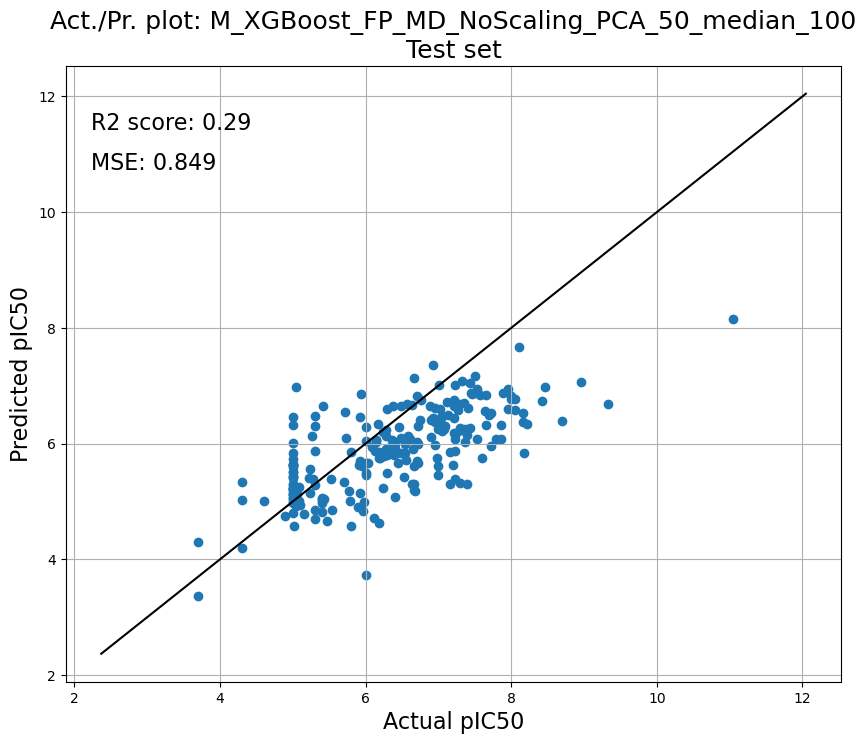

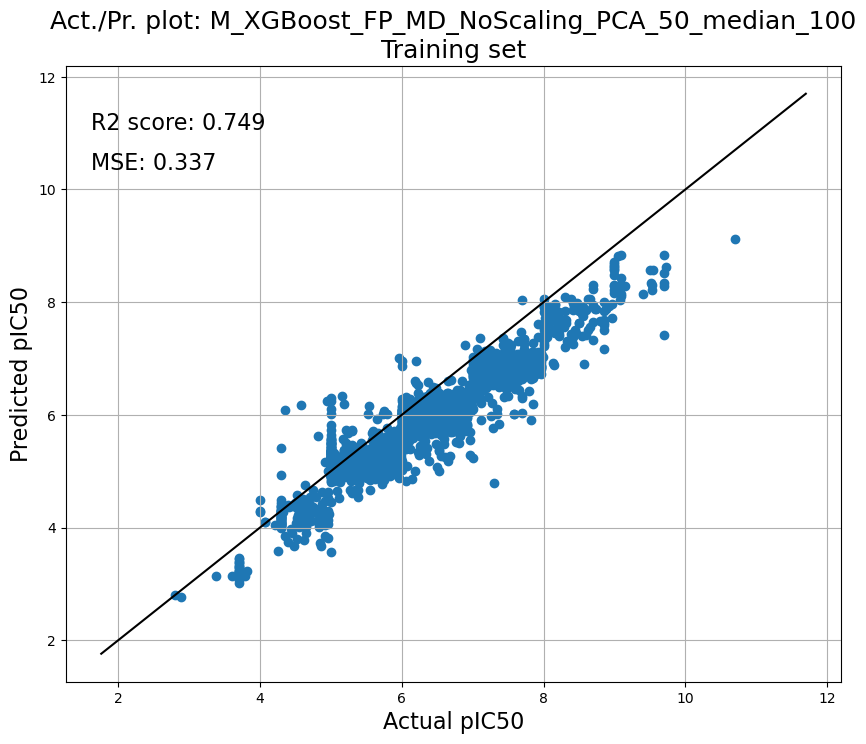

In [3]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50.json", result_file=RESULT_FILE_REGRESSOR)

2023-06-29 12:05:10,584 - logger - INFO - Training configuration:
2023-06-29 12:05:10,585 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-29 12:05:10,586 - logger - INFO - Prediction type: classification
2023-06-29 12:05:10,586 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50.csv_processed.csv
2023-06-29 12:05:10,586 - logger - INFO - Max. activity level: 1
2023-06-29 12:05:10,587 - logger - INFO - Std. threshold: 100
2023-06-29 12:05:10,588 - logger - INFO - Data preparation strategy: median
2023-06-29 12:05:10,588 - logger - INFO - Model storage: ar_xgboost_classifier_pca50.model
2023-06-29 12:05:10,589 - logger - INFO - Pipeline configuration:
2023-06-29 12:05:10,589 - logger - INFO - FPs?: yes
2023-06-29 12:05:10,590 - logger - INFO - FP size?: 1024
2023-06-29 12:05:10,591 - logger - INFO - MDs?: yes
2023-06-29 12:05:10,592 - logger - INFO - Scaling?: no
2023-06-29 12:05:10,595 - logger - INFO - PCA?: yes
2023-06-29 12:05:10,597 - logger -

2023-06-29 12:05:10,630 - logger - INFO - CreateFPS transform...
100%|██████████| 2096/2096 [00:02<00:00, 872.34it/s]
2023-06-29 12:05:16,649 - logger - INFO - Scaler fit...
2023-06-29 12:05:16,779 - logger - INFO - CreateFPS fit...
2023-06-29 12:05:16,779 - logger - INFO - CreateFPS transform...
100%|██████████| 233/233 [00:00<00:00, 791.95it/s]
2023-06-29 12:05:17,511 - logger - INFO - PCA transform...
2023-06-29 12:05:17,701 - logger - INFO - Precision on hold-out: 0.854167
2023-06-29 12:05:17,701 - logger - INFO - Recall on hold-out: 0.854167
2023-06-29 12:05:17,702 - logger - INFO - Accuracy on hold-out: 0.819742
2023-06-29 12:05:17,702 - logger - INFO - F1-score on hold-out: 0.854167
2023-06-29 12:05:17,703 - logger - INFO - ROC-AUC on hold-out: 0.809106
2023-06-29 12:05:17,703 - logger - INFO - Average precision on hold-out: 0.819729
2023-06-29 12:05:17,704 - logger - INFO - MCC on hold-out: 0.618212
2023-06-29 12:05:17,835 - logger - INFO - Performance on training set
2023-06-2

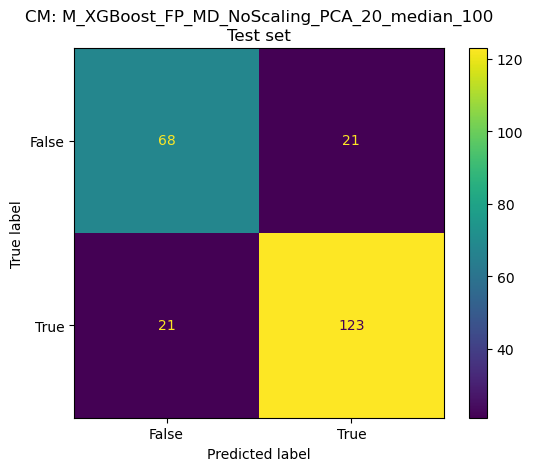

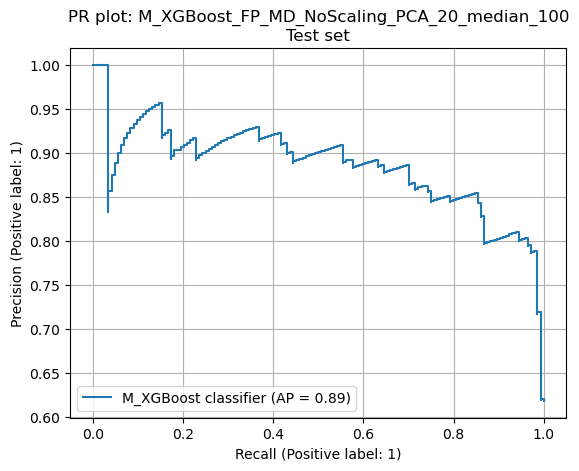

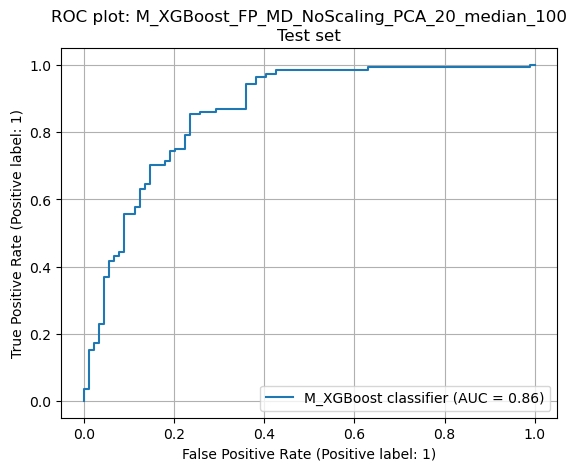

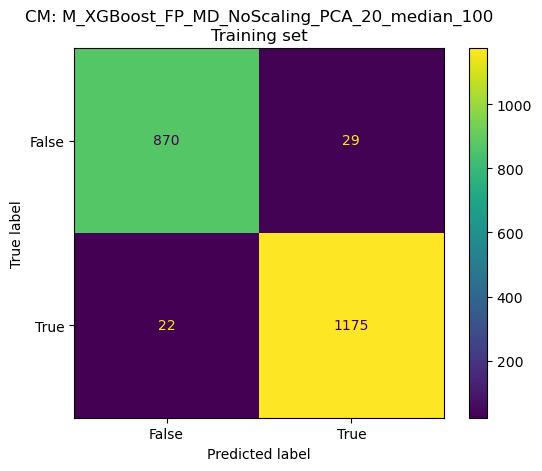

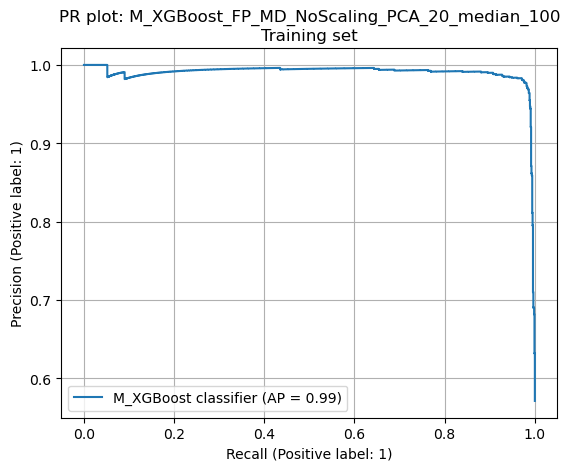

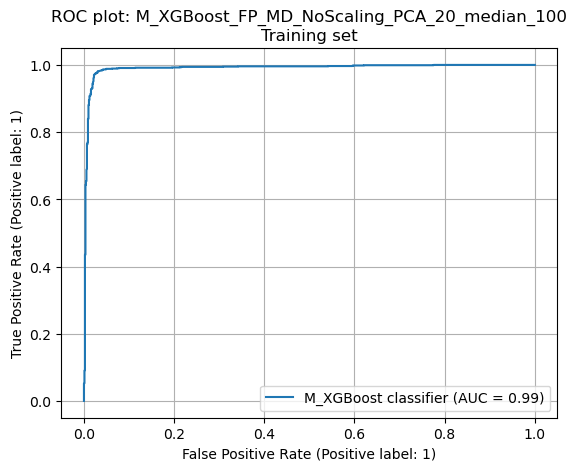

In [4]:
analyze_classifier(co.TRAINING_CONF_DIR/"ar_xgboost_classifier_pca50.json", result_file=RESULT_FILE_CLASSIFIER)

In [6]:
smiles_codes_train, y_train, y_train_pred, smiles_codes_val, y_train_val, y_train_val_pred = get_predictions_classifier(co.TRAINING_CONF_DIR/"ar_xgboost_classifier_pca50.json")

2023-06-29 12:06:31,207 - logger - INFO - PCA constructor...
2023-06-29 12:06:31,208 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 173, 'max_depth': 7, 'min_child_weight': 1.0, 'eta': 0.2776847527152384, 'subsample': 0.5895792778017735, 'colsample_bytree': 0.709637292897123, 'gamma': 0.3788762302046983, 'reg_alpha': 1.5770868999547145, 'reg_lambda': 1.2106185690694131, 'objective': 'reg:logistic'}
2023-06-29 12:06:31,209 - logger - INFO - Performance on external (hold-out) set
2023-06-29 12:06:31,210 - logger - INFO - CreateFPS fit...


2023-06-29 12:06:31,211 - logger - INFO - CreateFPS transform...
100%|██████████| 2096/2096 [00:02<00:00, 894.96it/s]
2023-06-29 12:06:37,055 - logger - INFO - Scaler fit...
2023-06-29 12:06:37,177 - logger - INFO - CreateFPS fit...
2023-06-29 12:06:37,178 - logger - INFO - CreateFPS transform...
100%|██████████| 233/233 [00:00<00:00, 742.65it/s]
2023-06-29 12:06:37,927 - logger - INFO - PCA transform...
2023-06-29 12:06:37,950 - logger - INFO - Performance on training set
2023-06-29 12:06:37,951 - logger - INFO - CreateFPS fit...
2023-06-29 12:06:37,952 - logger - INFO - CreateFPS transform...
100%|██████████| 2096/2096 [00:02<00:00, 792.50it/s]
2023-06-29 12:06:44,588 - logger - INFO - Scaler fit...
2023-06-29 12:06:44,716 - logger - INFO - CreateFPS fit...
2023-06-29 12:06:44,716 - logger - INFO - CreateFPS transform...
100%|██████████| 2096/2096 [00:02<00:00, 787.93it/s]
2023-06-29 12:06:51,465 - logger - INFO - PCA transform...


In [8]:
df_actual_pred = pd.concat([smiles_codes_val, y_train_val, y_train_val_pred], axis=1)
df_actual_pred.columns = ["coms_canonical_smiles", "experimental_value", "predicted_value"]
df_actual_pred

,coms_canonical_smiles,experimental_value,predicted_value
1637,CCc1cc2c(C(F)(F)F)cc(=O)[nH]c2cc1N,True,0.922289
649,N#Cc1ccc(SCC2CC2)cc1C(F)(F)F,True,0.988288
1658,CCOC(=O)C(CC)Oc1ccc2c(C)cc(=O)oc2c1,False,0.011701
544,C[C@@H](Nc1cc(C(F)(F)F)c(C#N)cn1)c1ccccc1,False,0.183066
1592,CC[C@@H]1CC2=CC(=O)CC[C@@H]2[C@H]2CC[C@@]3(CC)...,True,0.874896
...,...,...,...
1626,O=c1cc(C(F)(F)F)c2ccc(NC3CCC3)cc2[nH]1,True,0.944067
282,O=C1[C@@H]2C3C=CC(CCC3)[C@@H]2C(=O)N1c1ccc([N+...,True,0.847121
1194,Fc1ccc(C2=NOC3CCCCCC23)c(C(F)(F)F)c1,True,0.186525
1229,c1ccc(OCCCSc2nc3ccccc3[nH]2)cc1,False,0.002781


In [9]:
df_actual_pred.to_csv("C:/Users/rbachorz/Projects/qsarmodeler/qsarmodeler/data/processed/ar/classifier_validation_actual_predicted.csv")

# Expert

2023-06-27 07:56:17,005 - logger - INFO - Training configuration:
2023-06-27 07:56:17,006 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-27 07:56:17,007 - logger - INFO - Prediction type: regression
2023-06-27 07:56:17,008 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert.csv
2023-06-27 07:56:17,009 - logger - INFO - Max. activity level: 1
2023-06-27 07:56:17,010 - logger - INFO - Std. threshold: 100
2023-06-27 07:56:17,010 - logger - INFO - Data preparation strategy: median
2023-06-27 07:56:17,012 - logger - INFO - Model storage: ar_xgboost_regressor_pca50_expert.model
2023-06-27 07:56:17,012 - logger - INFO - Pipeline configuration:
2023-06-27 07:56:17,013 - logger - INFO - FPs?: yes
2023-06-27 07:56:17,015 - logger - INFO - FP size?: 1024
2023-06-27 07:56:17,016 - logger - INFO - MDs?: yes
2023-06-27 07:56:17,016 - logger - INFO - Scaling?: no
2023-06-27 07:56:17,017 - logger - INFO - PCA?: yes
2023-06-27 07:56:17,018 - 

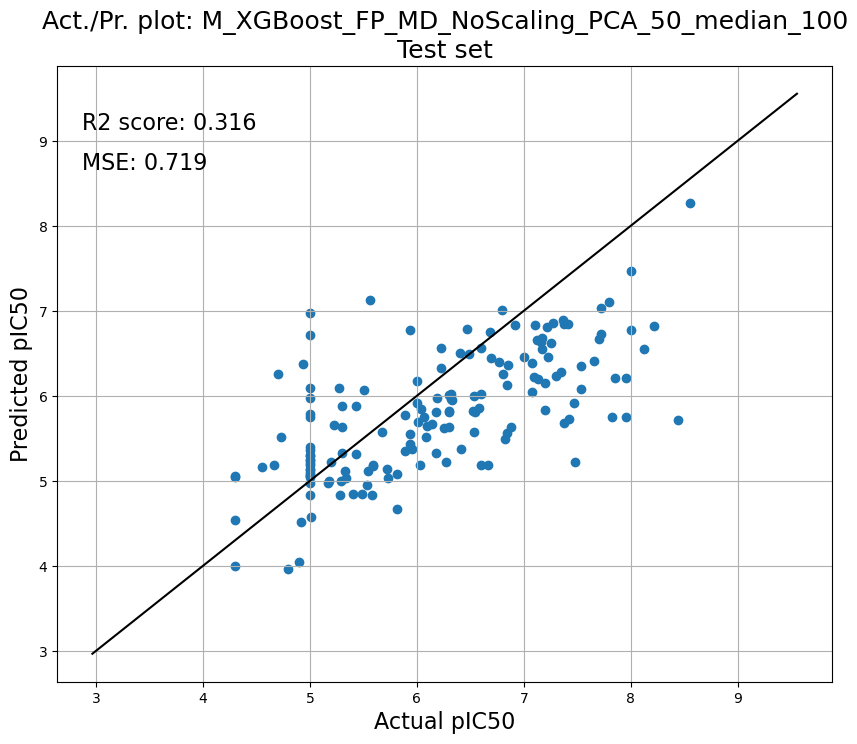

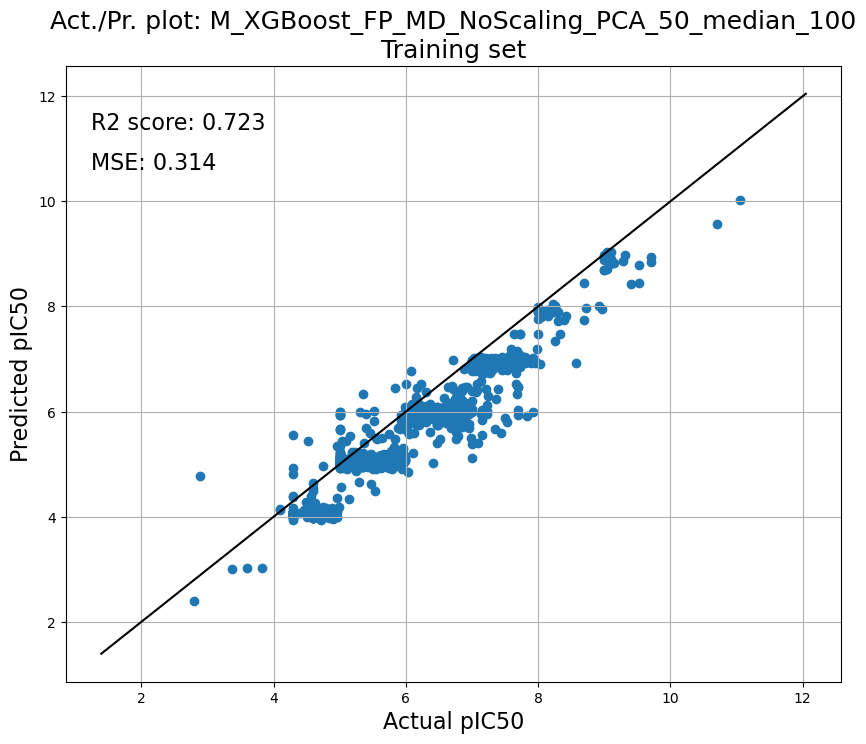

In [5]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert.json", result_file=RESULT_FILE_REGRESSOR)

2023-06-27 07:56:45,349 - logger - INFO - Training configuration:
2023-06-27 07:56:45,350 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-27 07:56:45,351 - logger - INFO - Prediction type: regression
2023-06-27 07:56:45,351 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert_regressor_case.csv
2023-06-27 07:56:45,352 - logger - INFO - Max. activity level: 1
2023-06-27 07:56:45,353 - logger - INFO - Std. threshold: 100
2023-06-27 07:56:45,353 - logger - INFO - Data preparation strategy: median
2023-06-27 07:56:45,353 - logger - INFO - Model storage: ar_xgboost_regressor_pca50_expert_special_data.model
2023-06-27 07:56:45,354 - logger - INFO - Pipeline configuration:
2023-06-27 07:56:45,354 - logger - INFO - FPs?: yes
2023-06-27 07:56:45,355 - logger - INFO - FP size?: 1024
2023-06-27 07:56:45,355 - logger - INFO - MDs?: yes
2023-06-27 07:56:45,355 - logger - INFO - Scaling?: no
2023-06-27 07:56:45,356 - logger - INFO - PCA?: ye

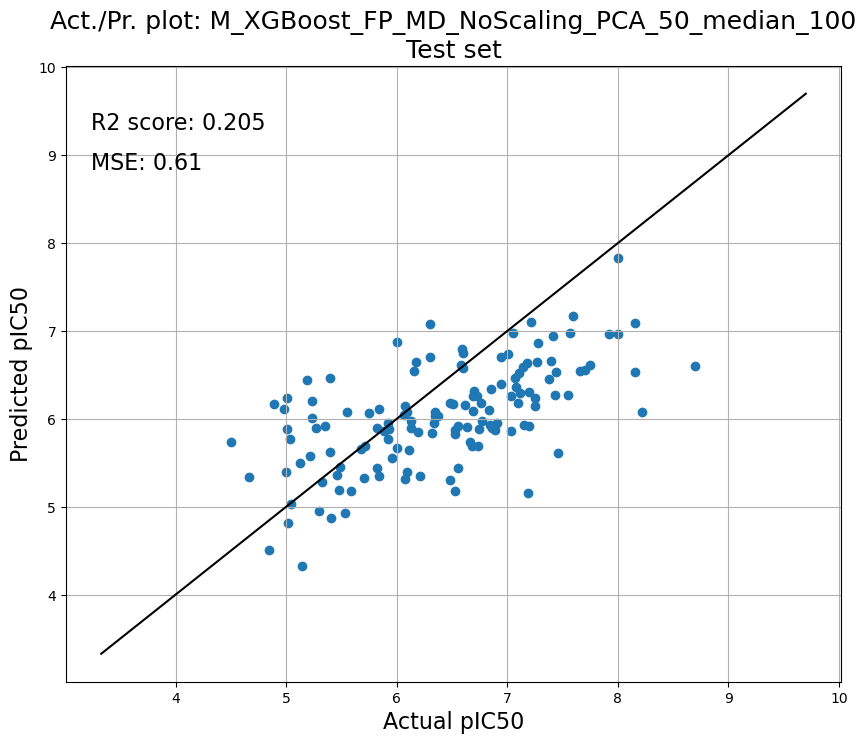

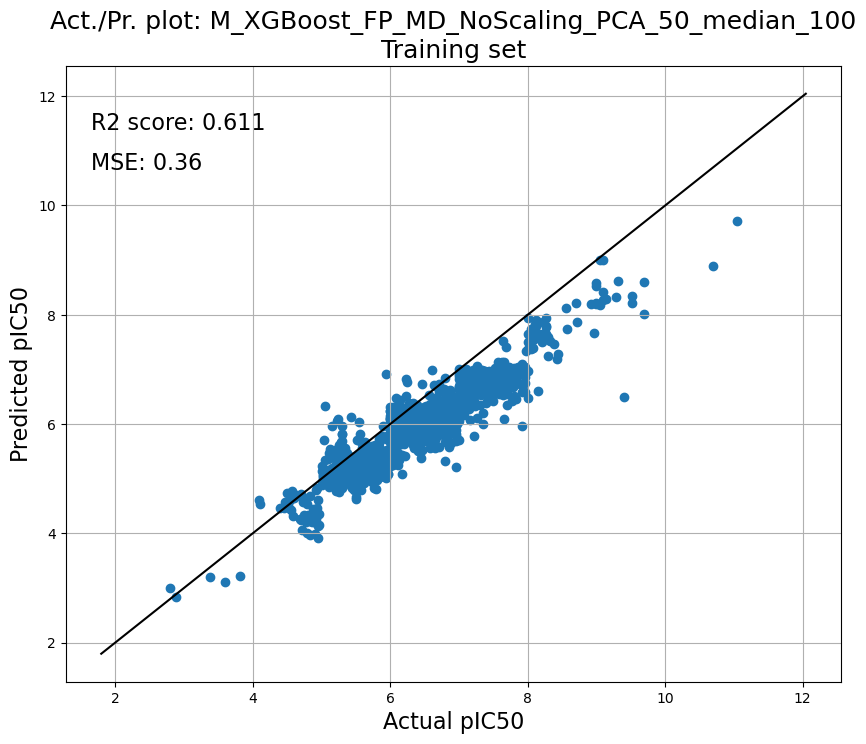

In [6]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert_special_data.json", result_file=RESULT_FILE_REGRESSOR)

In [7]:
smiles_codes_train, y_train, y_train_pred, smiles_codes_val, y_train_val, y_train_val_pred = get_predictions_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert_special_data.json")

2023-06-27 07:57:07,943 - logger - INFO - PCA constructor...
2023-06-27 07:57:07,969 - logger - INFO - PCA constructor...
2023-06-27 07:57:07,970 - logger - INFO - Optimal hyperparameters:, {'n_estimators': 165, 'max_depth': 19, 'min_child_weight': 4.0, 'eta': 0.052721384855039896, 'subsample': 0.9127439987113598, 'colsample_bytree': 0.9467561247394345, 'gamma': 1.146865724752578, 'reg_alpha': 0.18363195123299003, 'reg_lambda': 0.891897577803261, 'objective': 'reg:squarederror'}
2023-06-27 07:57:07,970 - logger - INFO - CreateFPS fit...


2023-06-27 07:57:07,971 - logger - INFO - CreateFPS transform...
100%|██████████| 1211/1211 [00:01<00:00, 921.62it/s]
2023-06-27 07:57:11,245 - logger - INFO - Scaler fit...
2023-06-27 07:57:11,351 - logger - INFO - CreateFPS fit...
2023-06-27 07:57:11,352 - logger - INFO - CreateFPS transform...
100%|██████████| 135/135 [00:00<00:00, 874.42it/s]
2023-06-27 07:57:11,760 - logger - INFO - PCA transform...
2023-06-27 07:57:11,775 - logger - INFO - CreateFPS fit...
2023-06-27 07:57:11,775 - logger - INFO - CreateFPS transform...
100%|██████████| 1211/1211 [00:01<00:00, 930.73it/s]
2023-06-27 07:57:15,041 - logger - INFO - Scaler fit...
2023-06-27 07:57:15,217 - logger - INFO - CreateFPS fit...
2023-06-27 07:57:15,218 - logger - INFO - CreateFPS transform...
100%|██████████| 1211/1211 [00:01<00:00, 797.95it/s]
2023-06-27 07:57:19,008 - logger - INFO - PCA transform...


In [11]:
df_actual_pred = pd.concat([smiles_codes_val, y_train_val, y_train_val_pred], axis=1)
df_actual_pred.columns = ["coms_canonical_smiles", "experimental_value", "predicted_value"]
df_actual_pred

,coms_canonical_smiles,experimental_value,predicted_value
894,[C-]#[N+]c1ccc(N2C(=O)C3(CCC3)N(c3ccc(CCCC(=O)...,7.036212,5.865554
1140,CC1(C)NC(=O)N(c2ccnc3ccccc23)C1=O,5.886057,5.859020
339,C[C@]12CCC(=O)C=C1C[C@@H](CCCc1ccc(OCCC(=O)O)c...,6.522879,5.833606
691,CC(c1nc(-c2ccccn2)no1)n1c(=O)n(-c2ccc(C#N)c(Cl...,6.736364,5.692888
277,CCC[C@]12CC[C@H](O)CC1=CCC1C2CC[C@@]2(C)C1CC[C...,5.752272,6.069440
...,...,...,...
651,CC(c1nnc(-c2cccc(F)c2)o1)N1CC(C)(C)C(Oc2ccc(C#...,7.113509,6.297620
585,CCC(C)N1CC(C)(C)C(Oc2ccc(C#N)c(C(F)(F)F)c2)C1=O,5.009217,6.241900
842,CN1CCN(OC(=O)N[C@@H]2C[C@]3(C)O[C@]2(C)[C@@H]2...,8.221849,6.076987
461,Cc1ccc(Oc2ccc(C#N)c(C(F)(F)F)c2)cc1,5.273273,5.894049


In [12]:
df_actual_pred.to_csv("C:/Users/rbachorz/Projects/qsarmodeler/qsarmodeler/data/processed/ar/regressor_validation_actual_predicted.csv")

2023-06-27 13:47:59,911 - logger - INFO - Training configuration:
2023-06-27 13:47:59,913 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-27 13:47:59,915 - logger - INFO - Prediction type: regression
2023-06-27 13:47:59,916 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert_regressor_case_removed_badly_predicted.csv
2023-06-27 13:47:59,917 - logger - INFO - Max. activity level: 1
2023-06-27 13:47:59,918 - logger - INFO - Std. threshold: 100
2023-06-27 13:47:59,919 - logger - INFO - Data preparation strategy: median
2023-06-27 13:47:59,920 - logger - INFO - Model storage: ar_xgboost_regressor_pca50_expert_special_data_removed_badly_predicted.model
2023-06-27 13:47:59,922 - logger - INFO - Pipeline configuration:
2023-06-27 13:47:59,923 - logger - INFO - FPs?: yes
2023-06-27 13:47:59,924 - logger - INFO - FP size?: 1024
2023-06-27 13:47:59,925 - logger - INFO - MDs?: yes
2023-06-27 13:47:59,926 - logger - INFO - Scaling?: no
20

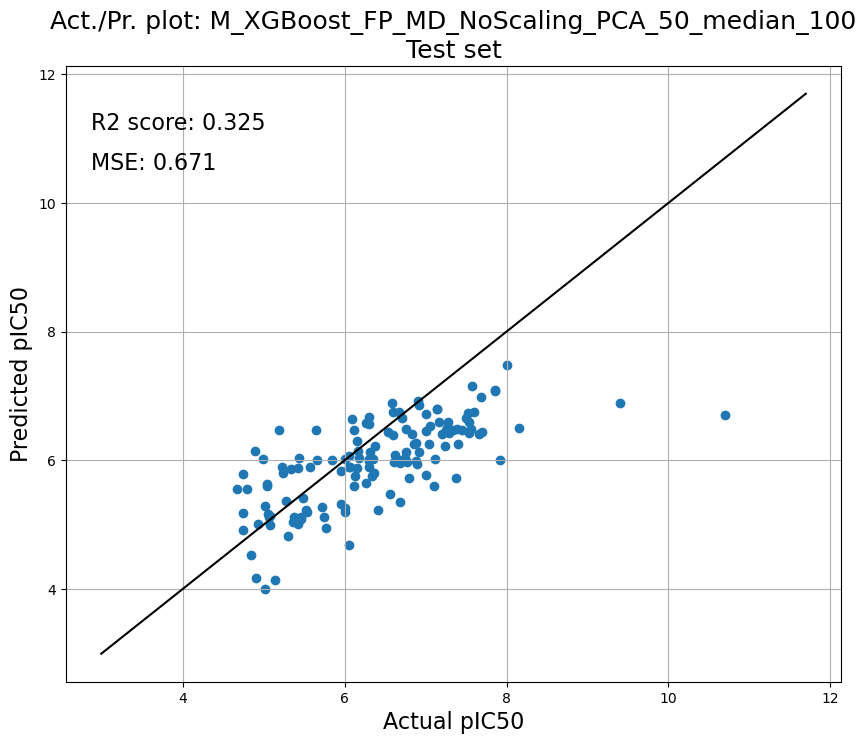

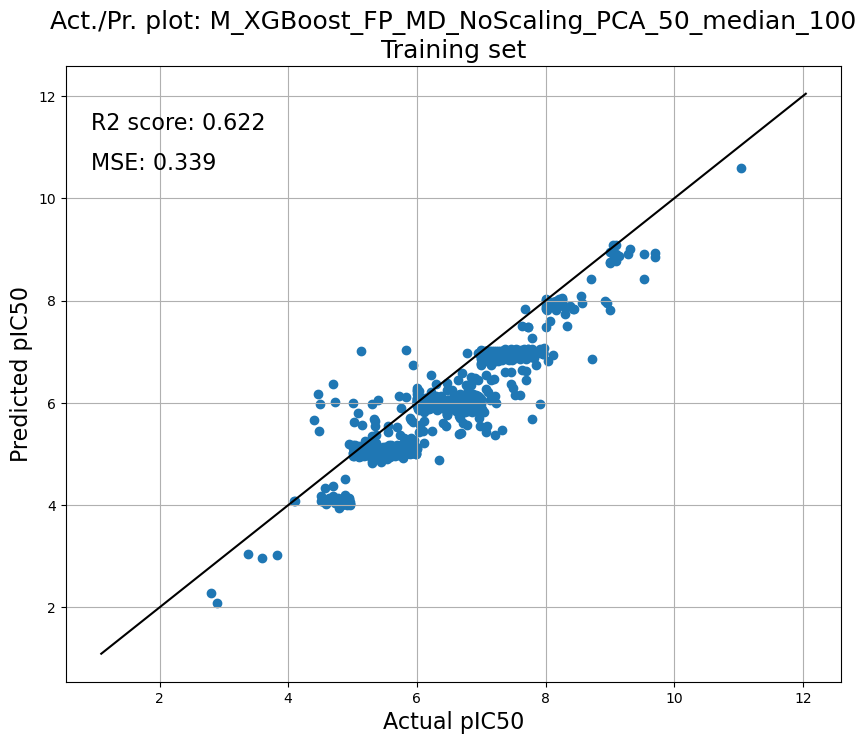

In [13]:
analyze_regressor(co.TRAINING_CONF_DIR/"ar_xgboost_regressor_pca50_expert_special_data_removed_badly_predicted.json", result_file=RESULT_FILE_REGRESSOR)

2023-06-25 19:57:22,229 - logger - INFO - Training configuration:
2023-06-25 19:57:22,231 - logger - INFO - Prediction methodology: M_XGBoost
2023-06-25 19:57:22,232 - logger - INFO - Prediction type: classification
2023-06-25 19:57:22,234 - logger - INFO - Data file: ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50EC50_combined_expert.csv
2023-06-25 19:57:22,235 - logger - INFO - Max. activity level: 1
2023-06-25 19:57:22,237 - logger - INFO - Std. threshold: 100
2023-06-25 19:57:22,239 - logger - INFO - Data preparation strategy: median
2023-06-25 19:57:22,241 - logger - INFO - Model storage: ar_xgboost_classifier_pca50_expert.model
2023-06-25 19:57:22,243 - logger - INFO - Pipeline configuration:
2023-06-25 19:57:22,244 - logger - INFO - FPs?: yes
2023-06-25 19:57:22,246 - logger - INFO - FP size?: 1024
2023-06-25 19:57:22,247 - logger - INFO - MDs?: yes
2023-06-25 19:57:22,249 - logger - INFO - Scaling?: no
2023-06-25 19:57:22,250 - logger - INFO - PCA?: yes
2023-06-25 19:57:22,2

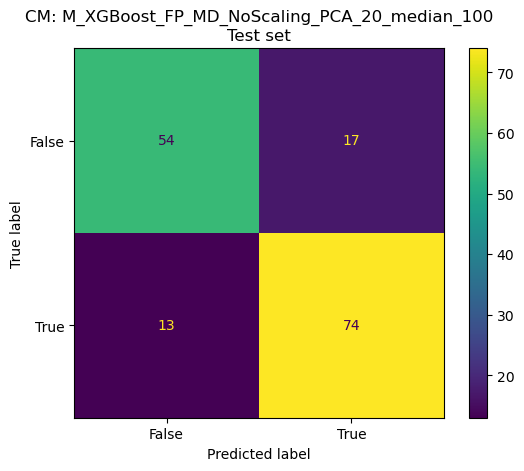

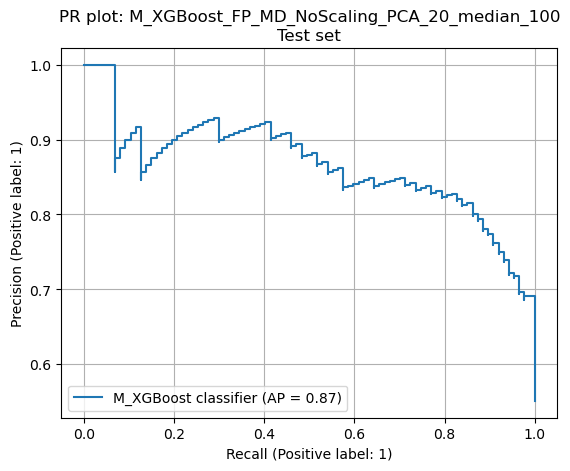

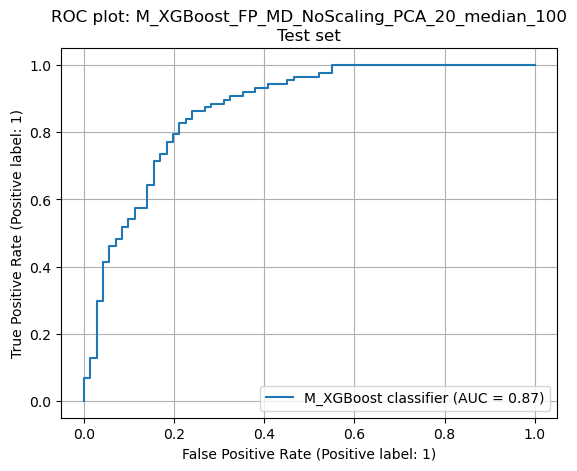

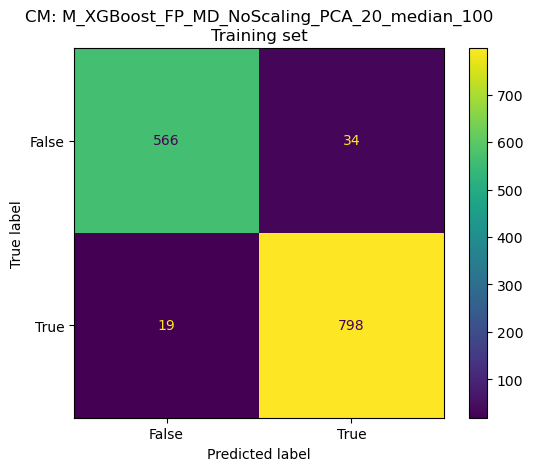

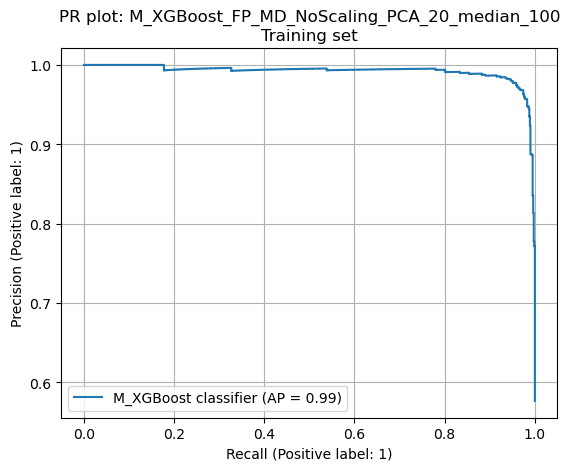

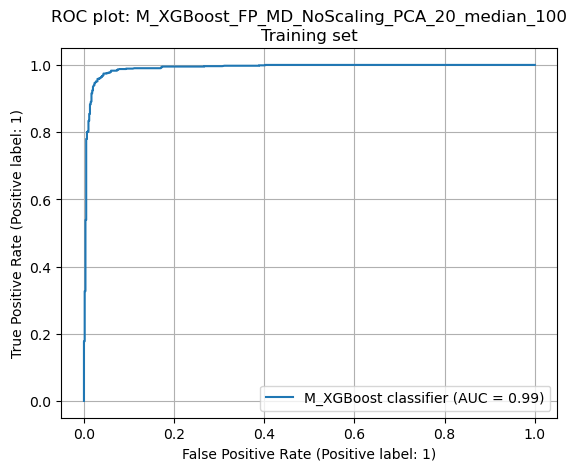

In [6]:
analyze_classifier(co.TRAINING_CONF_DIR/"ar_xgboost_classifier_pca50_expert.json", result_file=RESULT_FILE_CLASSIFIER)